## Import Modules

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk('TESS_Toronto_emotional_speech_set_data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [3]:
len(paths)

2800

In [4]:
paths[:5]

['TESS_Toronto_emotional_speech_set_data/YAF_disgust/YAF_date_disgust.wav',
 'TESS_Toronto_emotional_speech_set_data/YAF_disgust/YAF_rag_disgust.wav',
 'TESS_Toronto_emotional_speech_set_data/YAF_disgust/YAF_raise_disgust.wav',
 'TESS_Toronto_emotional_speech_set_data/YAF_disgust/YAF_ditch_disgust.wav',
 'TESS_Toronto_emotional_speech_set_data/YAF_disgust/YAF_door_disgust.wav']

In [5]:
labels[:5]

['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

In [3]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,TESS_Toronto_emotional_speech_set_data/YAF_dis...,disgust
1,TESS_Toronto_emotional_speech_set_data/YAF_dis...,disgust
2,TESS_Toronto_emotional_speech_set_data/YAF_dis...,disgust
3,TESS_Toronto_emotional_speech_set_data/YAF_dis...,disgust
4,TESS_Toronto_emotional_speech_set_data/YAF_dis...,disgust


In [7]:
df['label'].value_counts()

label
disgust    400
ps         400
happy      400
sad        400
neutral    400
fear       400
angry      400
Name: count, dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='count', ylabel='label'>

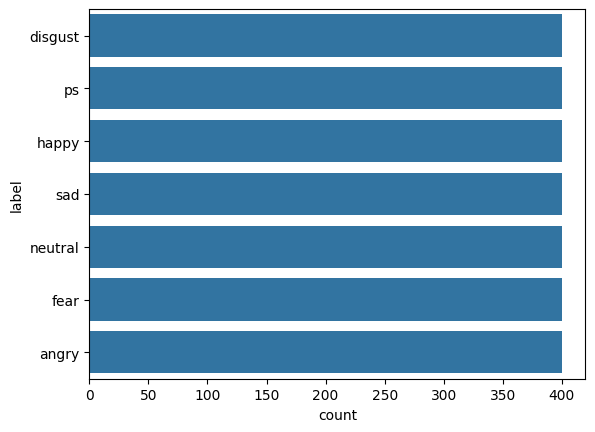

In [8]:
sns.countplot(df['label'])

In [4]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

AttributeError: module 'librosa.display' has no attribute 'waveplot'

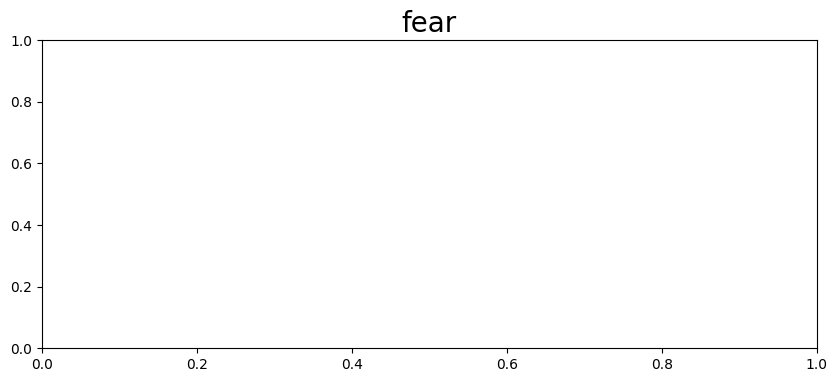

In [5]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [6]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [7]:
extract_mfcc(df['speech'][0])

array([-4.4636795e+02,  7.3789307e+01,  1.5521719e+00,  4.0626896e+01,
       -8.4494524e+00, -2.9341390e+00, -6.6822028e+00, -1.7199314e+01,
       -5.6114125e+00, -1.3409514e+01, -7.3893199e+00,  6.8370872e+00,
       -1.0458900e+01,  3.2033248e+00, -1.0037700e+00, -5.6148534e+00,
        4.2504106e+00, -1.1169560e+00, -9.1154451e+00,  2.1831045e+00,
       -7.7419267e+00,  6.4607906e-01, -3.6939952e+00,  3.7297630e-01,
       -2.0016887e+00, -1.8217636e+00, -2.7837276e+00,  2.8430927e+00,
       -3.0322783e+00,  4.5028725e+00, -8.8743937e-01,  4.2168193e+00,
        1.7408412e+00,  3.8251688e+00,  4.3130198e+00,  3.1095667e+00,
        3.5192683e+00,  4.1317463e+00,  2.2578502e+00,  2.3055403e+00],
      dtype=float32)

In [8]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [9]:
X_mfcc

0       [-446.36795, 73.78931, 1.552172, 40.626896, -8...
1       [-383.37564, 108.15568, -17.578175, 15.888096,...
2       [-404.0382, 87.21107, 0.48701975, 22.224413, -...
3       [-444.80597, 67.52622, -3.808903, 31.318571, -...
4       [-430.42755, 118.75985, 6.9652796, 5.204931, -...
                              ...                        
2795    [-574.7826, 95.66922, 34.85124, 16.821632, 17....
2796    [-557.9271, 89.87658, 33.661488, 15.33976, 22....
2797    [-527.0877, 115.282486, 26.17239, 7.6268435, 1...
2798    [-560.78094, 121.28371, 40.302486, -1.9568781,...
2799    [-552.6838, 106.72334, 35.1727, 8.060721, 22.6...
Name: speech, Length: 2800, dtype: object

In [10]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [11]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [12]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [13]:
y = y.toarray()

In [14]:
y.shape

(2800, 7)

## Create the LSTM Model

In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

2023-11-06 21:52:58.523796: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [16]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 10s 231ms/step - loss: 1.1602 - accuracy: 0.5562 - val_loss: 1.3681 - val_accuracy: 0.4036
Epoch 2/50
35/35 [==============================] - 7s 205ms/step - loss: 0.3107 - accuracy: 0.9085 - val_loss: 1.4424 - val_accuracy: 0.5679
Epoch 3/50
35/35 [==============================] - 7s 206ms/step - loss: 0.1750 - accuracy: 0.9473 - val_loss: 1.7502 - val_accuracy: 0.5500
Epoch 4/50
35/35 [==============================] - 7s 202ms/step - loss: 0.1235 - accuracy: 0.9652 - val_loss: 1.7182 - val_accuracy: 0.5804
Epoch 5/50
35/35 [==============================] - 7s 208ms/step - loss: 0.1589 - accuracy: 0.9522 - val_loss: 1.3989 - val_accuracy: 0.6643
Epoch 6/50
35/35 [==============================] - 8s 224ms/step - loss: 0.0961 - accuracy: 0.9723 - val_loss: 2.8090 - val_accuracy: 0.4464
Epoch 7/50
35/35 [==============================] - 7s 206ms/step - loss: 0.1048 - accuracy: 0.9714 - val_loss: 1.7368 - val_accuracy: 0.6411
Epoch

KeyboardInterrupt: 

In [ ]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

## Plot the results

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#model.save('SER_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
SER_model = load_model('SER_model.h5')

In [ ]:
SER_model.summary()

In [ ]:
import librosa
import numpy as np
from keras.models import load_model

# Load the model
model = load_model('model/SER_model.h5')  # Replace with the path to your model file

# Define the predict function
def predict_emotion(audio_file):
    # Extract MFCC features from the audio file
    mfcc = extract_mfcc(audio_file)  # Assuming you've defined this function

    # Reshape the MFCC features to match the model's input shape
    mfcc = mfcc.reshape(1, 40, 1)  # Shape should match (batch_size, num_features, num_timesteps)

    # Make predictions using the loaded model
    predictions = model.predict(mfcc)

    # Get the predicted emotion label
    predicted_label = np.argmax(predictions)

    if predicted_label==0:
        return 'Emotion: Angry'
    elif predicted_label==1:
        return 'Emotion: Disgust'
    elif predicted_label==2:
        return 'Emotion: Fear'
    elif predicted_label==3:
        return 'Emotion: Happy'
    elif predicted_label==4:
        return 'Emotion: Neutral'
    elif predicted_label==5:
        return 'Emotion: Pleasant_surprise'
    else:
        return 'Emotion: Sad'
    #return predicted_label  # Return the index of the predicted emotion category

In [ ]:
pip install sounddevice

In [ ]:
import sounddevice as sd
from scipy.io import wavfile
from IPython.display import Audio

In [ ]:
# Function to record audio and save it to a WAV file
def record_audio(file_path, duration=5):
    print("Recording audio...")
    audio_data = sd.rec(int(duration * 44100), samplerate=44100, channels=1, blocking=True)
    wavfile.write(file_path, 44100, audio_data)
    print(f"Audio saved to {file_path}")

In [ ]:
# Record and save audio
record_audio(audio_file_path)

In [ ]:
# Play the recorded audio
Audio(audio_file_path)

In [ ]:
#audio_file_path = ''# Replace with the path to your audio file
predicted_emotion_index = predict_emotion(audio_file_path)
print(predicted_emotion_index)

In [ ]:
audio_file_path = 'TESS_Toronto_emotional_speech_set_data/OAF_angry/OAF_back_angry.wav'
predicted_emotion_index = predict_emotion(audio_file_path)
print(predicted_emotion_index)

In [ ]:
model.save('SER_model_updated.h5')